In [1]:
from header import *
import math
plt.rcParams.update({'font.size': 16})

In [2]:
def getExperiment(experiment):
    trie_experiment_ecoli_dir = Path('/home/pesho/work/astarix-evals-br/tmp/heuristic_experiment/{}'.format(experiment))
    #trie_experiment_ecoli_dir = Path('experiments/heuristic_experiment/{}'.format(experiment))
    stats_files = list(trie_experiment_ecoli_dir.glob('**/stats.log'))
    frames = [pd.read_csv(f, sep='\t') for f in stats_files]
    df = pd.concat(frames)
    return df

dfs = {}
dfs['ecoli'] = getExperiment('ecoli_head1000000_linear')
dfs['MHC1'] = getExperiment('MHC1_head100000_linear')

In [3]:
display(dfs['MHC1'])

,AStarCostCap,AStarLengthCap,AStarNodeEqivClasses,algorithm,align_gb,align_sec,construct_trie_gb,construct_trie_sec,cost_del,cost_ins,cost_match,cost_subst,graph_file,greedy_math,orig_graph_edges,orig_graph_nodes,precompute_gb,precompute_sec,query_file,read_graph_gb,read_graph_sec,read_queries_gb,read_queries_sec,threads,total_edges,total_gb,total_nodes,total_sec,tree_depth,trie_edges,trie_nodes,Unnamed: 31
0,6.0,3,1,astar-prefix,7.502953,1189.609315,0.317818,10.619876,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.007530,0.570711,tmp/M1-head.fa,0.287380,1.276287,0.0,0.006125,6,31234181,8.100620,14619481,1202.643205,11,20598143,4342755,NaN
0,5.0,1,1,astar-prefix,12.457584,2361.167066,0.317818,10.786998,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.043278,0.442627,tmp/M1-head.fa,0.287247,1.269785,0.0,0.006037,6,31234181,13.019371,14619481,2374.237368,11,20598143,4342755,NaN
0,3.0,5,1,astar-prefix,4.143097,640.609699,0.317757,12.147189,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.002743,0.639048,tmp/M1-head.fa,0.287373,1.317179,0.0,0.005993,6,31234181,4.745483,14619481,655.329259,11,20598143,4342755,NaN
0,2.0,8,1,astar-prefix,5.020203,621.567661,0.317757,12.213746,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,0.003799,0.815269,tmp/M1-head.fa,0.287487,1.311959,0.0,0.006002,6,31234181,5.629246,14619481,636.507271,11,20598143,4342755,NaN
0,4.0,2,1,astar-prefix,9.885914,1668.283059,0.317818,10.810440,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.010048,0.529182,tmp/M1-head.fa,0.287251,1.283674,0.0,0.005912,6,31234181,10.480934,14619481,1681.474238,11,20598143,4342755,NaN
0,3.0,1,1,astar-prefix,12.426418,2375.609169,0.317757,10.808472,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.043282,0.450275,tmp/M1-head.fa,0.287319,1.285832,0.0,0.006072,6,31234181,12.988213,14619481,2388.732147,11,20598143,4342755,NaN
0,0.0,7,1,astar-prefix,15.972336,3285.342717,0.317757,12.629087,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,0.001534,0.741193,tmp/M1-head.fa,0.287498,1.398237,0.0,0.009026,6,31234181,16.579124,14619481,3300.729183,11,20598143,4342755,NaN
0,0.0,8,1,astar-prefix,17.227196,3299.698778,0.317818,11.811790,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,0.003799,0.873383,tmp/M1-head.fa,0.287373,1.320130,0.0,0.006076,6,31234181,17.836185,14619481,3314.310514,11,20598143,4342755,NaN
0,1.0,1,1,astar-prefix,12.430714,2352.691803,0.317818,10.715601,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,-0.043282,0.456002,tmp/M1-head.fa,0.287258,1.278121,0.0,0.005899,6,31234181,12.992508,14619481,2365.710759,11,20598143,4342755,NaN
0,0.0,0,1,astar-prefix,14.730789,2877.582066,0.317757,10.799762,5,5,0,1,/home/pesho/work/astarix-paper-gitlab/evals/ra...,1,5318019,5138363,0.000000,0.055583,tmp/M1-head.fa,0.287445,1.280016,0.0,0.005900,6,31234181,15.335991,14619481,2890.279262,11,20598143,4342755,NaN


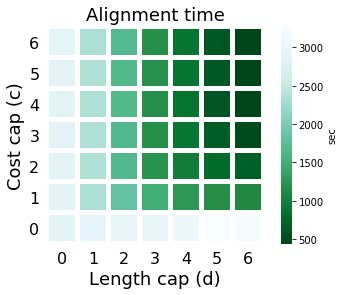

In [8]:
def plot_heatmap_c_vs_d(experiment, value, cmap):
    df = dfs[experiment]
    mind = min(df['AStarLengthCap'])
    maxd = max(df['AStarLengthCap'])
    minc = int(min(df['AStarCostCap']))
    maxc = int(max(df['AStarCostCap']))

    maxd = 6
    maxc = 6
    
    A = np.zeros((maxc+1, maxd+1))
    for index, row in df.iterrows():
        d, c = row['AStarLengthCap'], int(row['AStarCostCap']), 
        v = row[value]
        if d <= maxd and c <= maxc:
            A[c, d] = v

    #plt.imshow(A, cmap='hot', interpolation='nearest')
    ax = sns.heatmap(A, linewidth=4.0, cmap=cmap, #annot=True,
                     square=True, cbar_kws={"orientation": "vertical", "label": "sec"})
    ax.set_title(col2name(value), size=18)
    #ax.set_xticks(rotation=90)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,      # ticks along the bottom edge are off
        labelsize=16,
        labelrotation=0,
        #top=False,         # ticks along the top edge are off
    #    labelbottom=False # labels along the bottom edge are off
    )
    
    ax.set_xlabel('Length cap (d)', size=18)
    ax.set_ylabel('Cost cap (c)', size=18) #rotation=0, labelpad=13, size=16)
    
    # sns workaround
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

    ax.invert_yaxis()
    
    plt.savefig('{}-heatmap-c_vs_d-{}.pdf'.format(experiment, value), bbox_inches='tight')
    plt.show()
    
#plot_heatmap_c_vs_d('ecoli', 'align_sec', cmap='BuGn_r')
plot_heatmap_c_vs_d('MHC1', 'align_sec', cmap='BuGn_r')
#plot_heatmap_c_vs_d('ecoli', 'total_gb', cmap='RdYlGn_r')
#plot_heatmap_c_vs_d('MHC1', 'total_gb', cmap='RdYlGn_r')